In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


input_dir = os.path.join(os.path.dirname((os.path.abspath(""))), 'data') 
df = pd.read_csv(os.path.join(input_dir, 'training_data.csv'))


## Checking basic statistics for all columns
### Numeric: Summary statistics, histograms
### String: Unique values, % occurences

       ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   511.000000  511.000000        511.000000    511.000000
mean      3.206654    5.726027         14.532485    293.213307
std       1.194413    1.520864          3.164069     63.158713
min       1.000000    3.000000          4.900000    104.000000
25%       2.200000    4.000000         12.200000    251.000000
50%       3.000000    6.000000         14.200000    283.000000
75%       4.000000    6.000000         16.500000    336.000000
max       8.000000   12.000000         26.300000    495.000000
Details of MAKE:
Unique Values: 36
Top 5 Attribute Values by %:
MAKE
CHEVROLET     9.393346
FORD          9.197652
TOYOTA        7.240705
DODGE         7.240705
VOLKSWAGEN    5.675147
Name: proportion, dtype: float64


Details of MODEL:
Unique Values: 292
Top 5 Attribute Values by %:
MODEL
LS            1.174168
DAKOTA        0.978474
A6 QUATTRO    0.978474
626           0.782779
A4 QUATTRO    0.782779
Name: proportion, dtype: fl

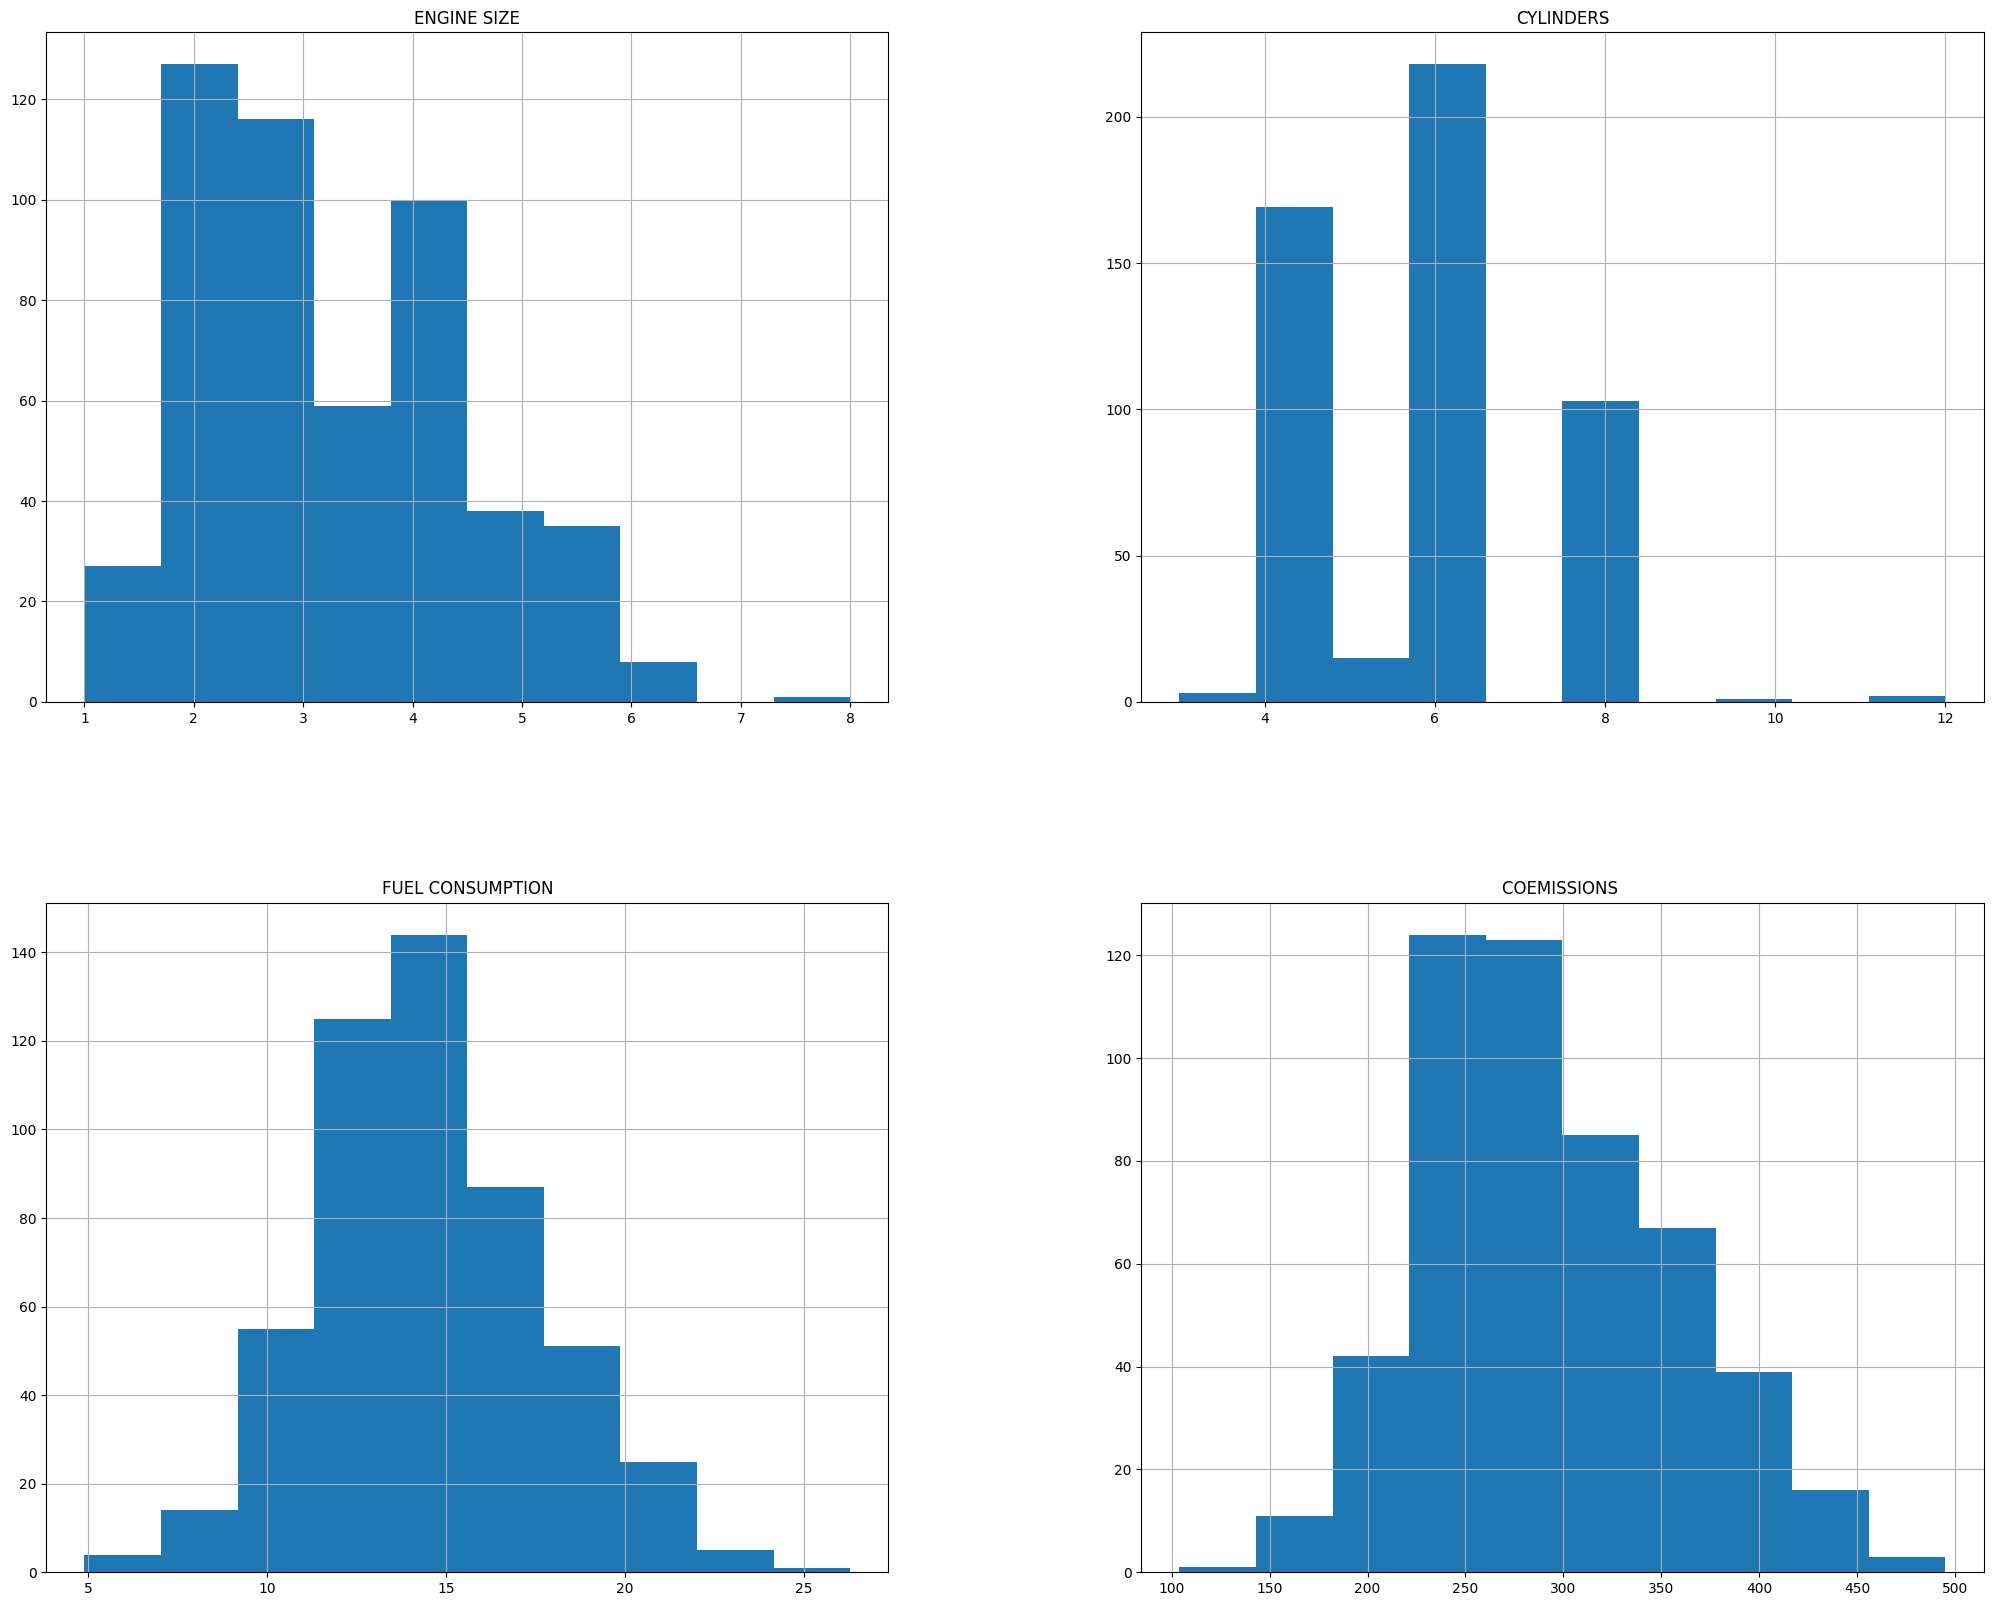

In [30]:
object_columns = df.select_dtypes(['object']).columns
num_columns = df.select_dtypes(['float64', 'int64']).columns
num_columns = num_columns.drop('FUEL CONSUMPTION')

## Numeric data
# Using in-built statistical summary
print(df.describe())

# Plot histograms for numeric data
df.hist(bins=10, figsize=(25, 20))


## Categorical Data
object_df = pd.DataFrame(columns=['Variable', 'Unique Values', 'Top 5 Categories', 'Top 5 %'])
for column in object_columns:
    nunique = df[column].nunique()
    top_5 = df[column].value_counts().nlargest(5)
    top_5_pct = df[column].value_counts(normalize=True).nlargest(5) * 100
    print(f"Details of {column}:")
    print(f"Unique Values: {nunique}")
    print(f"Top 5 Attribute Values by %:")
    print(top_5_pct)
    print("\n")
    # object_df = object_df._append({'Variable':column, 'Unique Values': nunique, 'Top 5 Category Counts':top_5, 'Top 5 %':top_5_pct}, ignore_index=True)

# Fuel and transmission, given they aren't highly branched attributes, represent large portions of the dataset (e.g. X Fuel is used in 70% of the cars).

### Analysing Correlations between Variables


FUEL CONSUMPTION    1.000000
COEMISSIONS         0.980528
ENGINE SIZE         0.867575
CYLINDERS           0.816789
cylinder_sqr        0.791091
TRANSMISSION_A4     0.232513
TRANSMISSION_M6     0.141411
FUEL_E              0.120322
FUEL_N              0.087799
FUEL_Z              0.048130
TRANSMISSION_A5     0.045744
TRANSMISSION_AS5    0.035617
TRANSMISSION_AS4   -0.006500
FUEL_X             -0.022238
TRANSMISSION_M5    -0.319262
Name: FUEL CONSUMPTION, dtype: float64


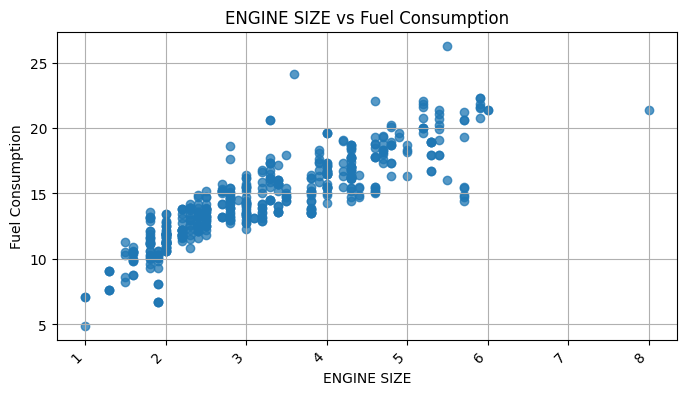

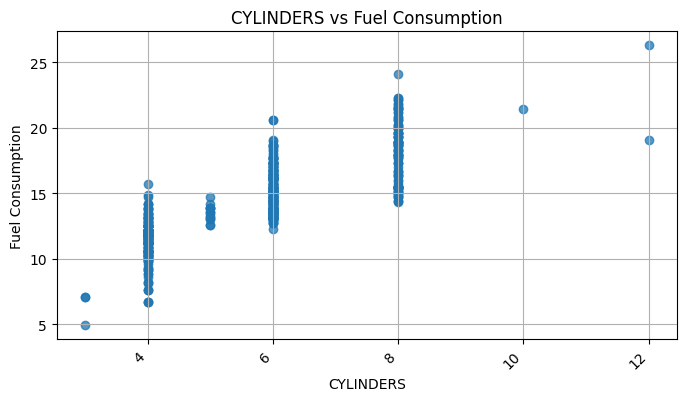

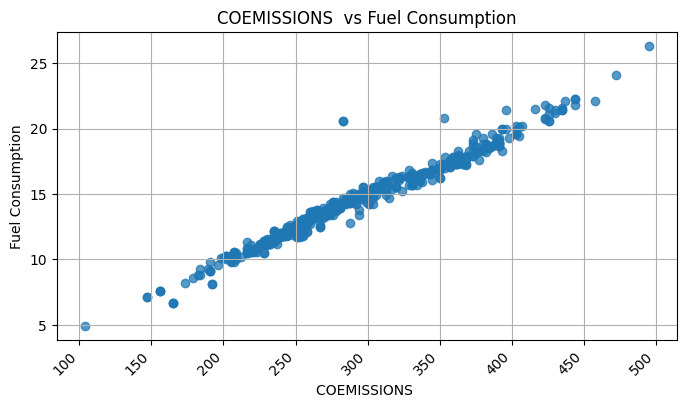

[[1.         0.79109096]
 [0.79109096 1.        ]]


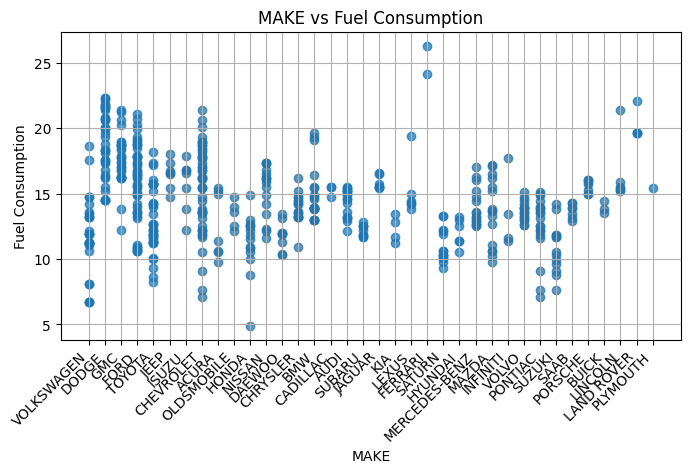

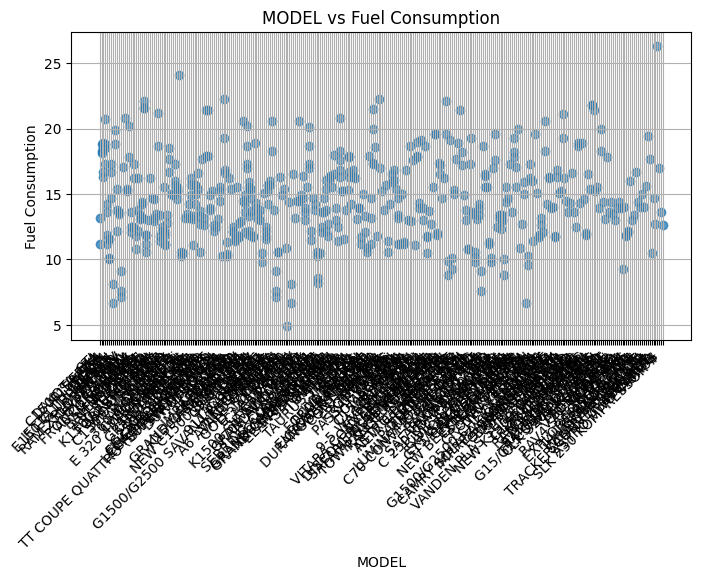

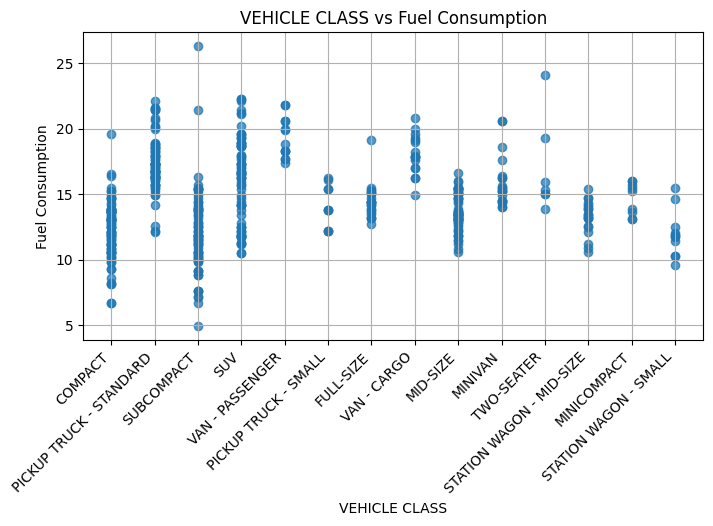

In [33]:
## For numeric variables
correlation = df.corr(numeric_only=True)
fuel_correlation = correlation['FUEL CONSUMPTION'].sort_values(ascending=False)
print(fuel_correlation)

# Extremely high correlation between coemissions, engine size, and cylinders is observed.
# We can create scatter plots for these three variables to visualize the relationships better, and identify non-linear relationships.

for column in num_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[column], df['FUEL CONSUMPTION'], alpha=0.75)
    plt.title(f'{column} vs Fuel Consumption')
    plt.xlabel(column)
    plt.ylabel('Fuel Consumption')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

# For cylinders, though the correlation coefficient seems low, we can see a non-linear (Quadratic) relationship with fuel.
# Calculating coefficient between fuel consumption and cylinders^2:
df['cylinder_sqr'] = df['CYLINDERS']**2
print(np.corrcoef(df['cylinder_sqr'], df['FUEL CONSUMPTION'])) # The coefficient is 0.791 (3 s.f.), indicating a quadratic relation is unideal for modelling the relationship

## For categorical/string variables, use object columns to plot them against fuel consumption

for column in object_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[column], df['FUEL CONSUMPTION'], alpha=0.75)
    plt.title(f'{column} vs Fuel Consumption')
    plt.xlabel(column)
    plt.ylabel('Fuel Consumption')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()
